# Part II - Ford GoBike System Data
## by Ahmed Balkhair

## Investigation Overview


> Customers ride a lot on weekends, especially in the afternoon, but subscribers use the system substantially throughout the weekdays, from Monday through Friday. Customers prefer to use more in the late afternoon around 17 pm, but subscribers tend to make more journeys between 8 and 9 am and 17 and 18 pm on workdays. Subscribers' efficient/short periods of consumption are consistent with their high concentration during Monday through Friday rush hours, showing that the use is mostly for commuting to work. The more relaxed and adaptable usage pattern of the customers reveals that they utilize the bike-sharing system somewhat differently from the subscribers, frequently on weekends and in the afternoons, possibly for sightseeing or touring purposes.


## Dataset Overview

> Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area. It was established as Bay Area Bike Share and was re-launched later as Ford GoBike in a partnership with Ford Motor Company.

> The dataset used for this exploratory analysis consists of monthly individual trip data from January 2018 to December 2018 in CSV format covering the greater San Francisco Bay area. In this project, I will perform an exploratory analysis of data provided by Ford GoBike, a bike-share system provider.

> The initial FordGoBike dataset was consisted of 16 features and 183412 records. The data collected is for February 2019 of approximately 183,412 bike rides in the San Francisco Bay area of California, USA documented.

In [1]:
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /opt/conda/lib/python3.6/site-packages (0.11.2)


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df= pd.read_csv('fordgobike_tripdata_master.csv')

In [4]:
base_color= sb.color_palette()[0]
sb.set_style("darkgrid")

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## No. Rides by Hour

> The bikes were used most frequently between the hours of 8 and 9 in the morning and 5 to 6 in the afternoon, which corresponds to an American workweek. This strengthens the argument that commuters are the main users of the bikes.


<Figure size 1080x576 with 0 Axes>

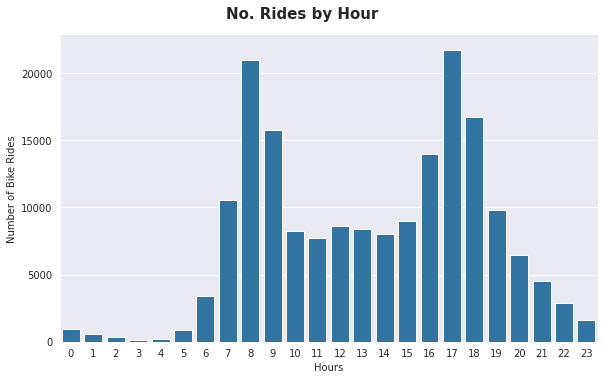

In [5]:
plt.figure(figsize=[15, 8]);

ax = sb.catplot(data = df, x='start_time_hour', kind='count', color = base_color, aspect = 1.7)

ax.set_axis_labels('Hours', 'Number of Bike Rides');

ax.fig.suptitle('No. Rides by Hour', y=1.05, fontsize=15, fontweight='bold');

## Trends by User Type

> The point plot shown below is a great illustration of the stark differences between customers and subscribers. Customers use the bike share system quite seldom, with just a slight uptick on weekends. The opposite is true for subscribers; weekday usage is consistently strong with a substantial fall on the weekends.

In [6]:
weekday= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ordered_weekday= pd.api.types.CategoricalDtype(ordered= True, categories= weekday)
df['start_time_weekday']= df['start_time_weekday'].astype(ordered_weekday)

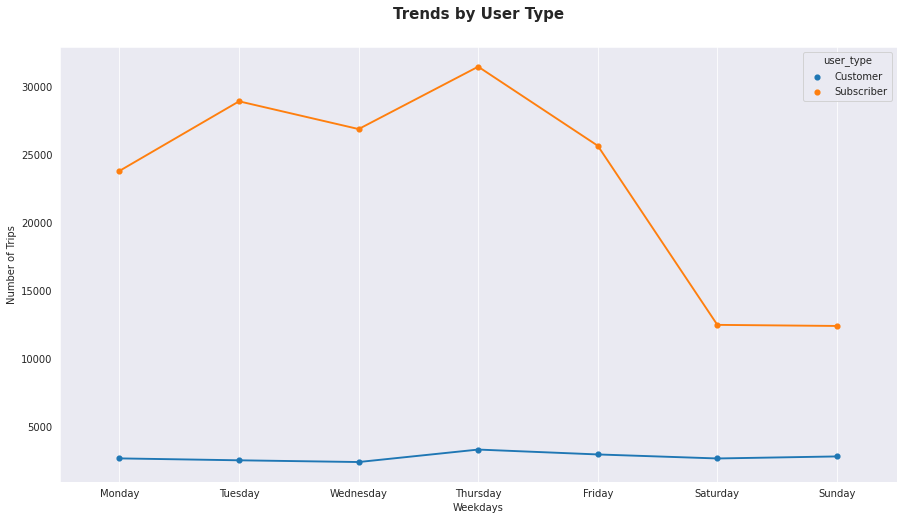

In [7]:
plt.figure(figsize=[ 15, 8]);

df_user_week = df.groupby(['start_time_weekday', 'user_type']).size().reset_index()

ax = sb.pointplot(data=df_user_week, x='start_time_weekday', y=0, hue = 'user_type', scale=.7);

plt.title('Trends by User Type', y=1.05, fontsize=15, fontweight='bold');
plt.xlabel('Weekdays');
plt.ylabel('Number of Trips');
plt.grid();

## Avg. Trip Duration by Weekday (by user type)

The customer and subscriber graphs don't share a common usage. The catplot and boxplot display the ride duration spread in minutes. In general, customer trips last longer (8 to 18 minutes, according to the box plot) than those of subscribers (5 to 12 minutes according to the box plot). This can likely be explained by the fact that subscribers are primarily commuters who make quick trips to work or school rather than more extensive journeys throughout the Bay Area.

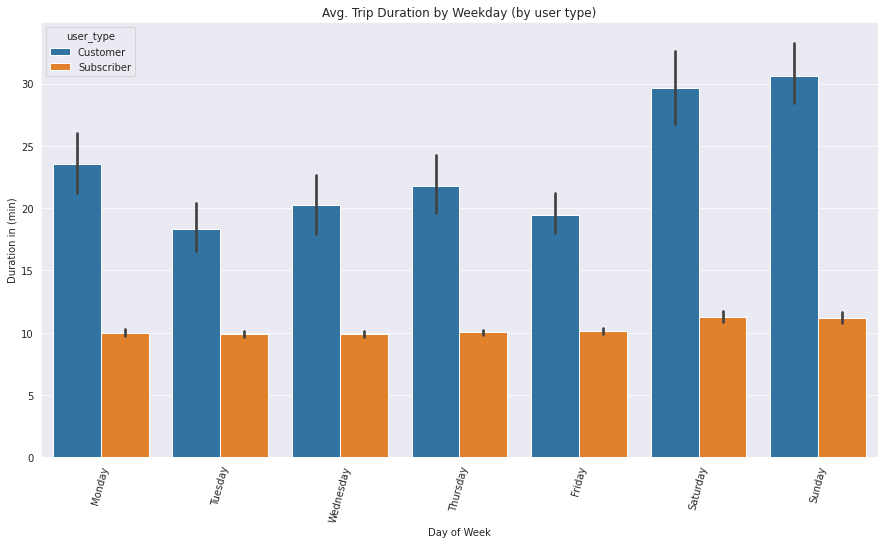

In [8]:
ax= sb.barplot(data=df, x='start_time_weekday', y= 'duration_min', hue='user_type')


ax.set(title= 'Avg. Trip Duration by Weekday (by user type)', xlabel= 'Day of Week', ylabel= 'Duration in (min)');

ax.tick_params(axis='x', rotation=75);
ax.figure.set_size_inches(15,8);

<Figure size 864x576 with 0 Axes>

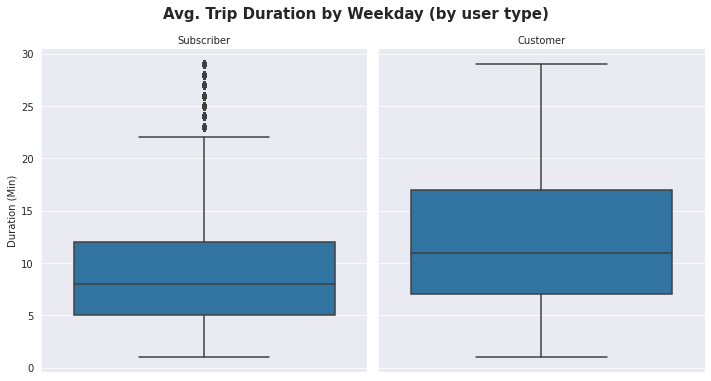

In [9]:
plt.figure(figsize=[12, 8]);

data = df.query('duration_min < 30')

ax = sb.catplot(data=data, y='duration_min', col="user_type", kind='box', color = base_color);

ax.set_titles(col_template = '{col_name}')
ax.set_axis_labels("", "Duration (Min)")
ax.fig.suptitle('Avg. Trip Duration by Weekday (by user type)', y=1.05, fontsize=15, fontweight='bold');

## Weekly Bike Trips Per Subscribers' Age Group

The most frequent age group to use the bike-sharing system is subscribers who are between the ages of 26 and 35. The second most frequent age group of users of the bike-sharing program is those who are 36 to 45 years old, and they exhibit a similar pattern to those who are 26 to 35 years old. There are very few rides available to the youngest age group, 15 to 25 years old, at first (compared to the entire dataset). and finally the rides seems to slowly decrease after the age of 35 when age gets older.

In [10]:
df['age_bins'] = df['member_age'].apply(lambda x: '15 - 25' if 15<x<=25
                                                  else '26 - 35' if 25<x<=35
                                                  else '36 - 45' if 35<x<=45
                                                  else '46 - 55' if 45<x<=55
                                                  else '56 - 65' if 55<x<=65
                                                  else '66 - 75' if 65<x<=75
                                                       else x)

In [11]:
subscriber_age_df = df[df['user_type'] == 'Subscriber'].groupby(['start_time_weekday', 'age_bins']).agg({'bike_id':'count'}).reset_index()

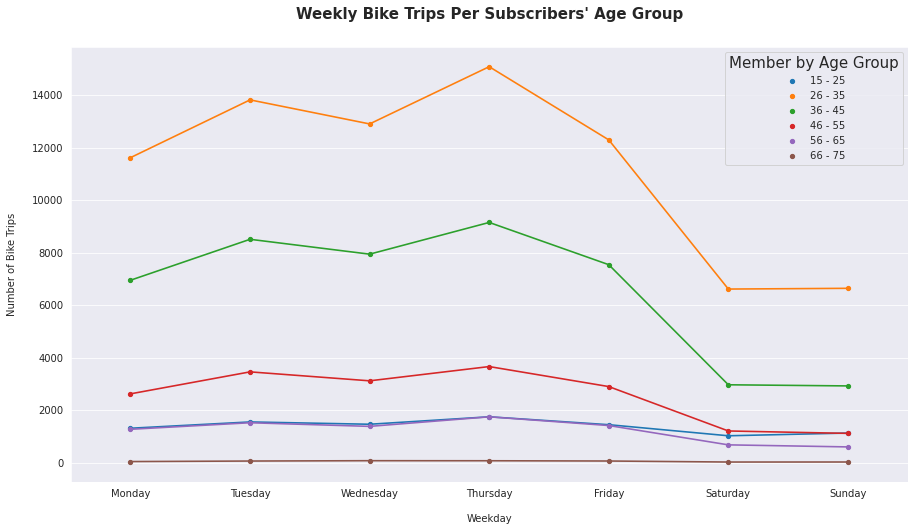

In [12]:
plt.figure(figsize=[15, 8]);

ax = sb.pointplot(data = subscriber_age_df, x='start_time_weekday', y='bike_id', hue='age_bins', scale=.6);

plt.xlabel('Weekday', labelpad = 15)
plt.ylabel('Number of Bike Trips', labelpad = 15)
plt.title("Weekly Bike Trips Per Subscribers' Age Group", y = 1.05, fontsize = 15, fontweight = 'bold');

# Legend
leg = ax.legend()
leg.set_title('Member by Age Group', prop={'size': 15})

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 384132 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/